In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("D:\\Rahul_Singh\\DATA_ANALYTICS\\Projects\\World GDP analysis using Python\\country_codes.csv")

In [3]:
df1

,country_code,region,income_group
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income
...,...,...,...
212,XKX,Europe & Central Asia,Upper middle income
213,YEM,Middle East & North Africa,Low income
214,ZAF,Sub-Saharan Africa,Upper middle income
215,ZMB,Sub-Saharan Africa,Lower middle income


In [4]:
df2=pd.read_csv("D:\\Rahul_Singh\\DATA_ANALYTICS\\Projects\\World GDP analysis using Python\\gdp_data.csv")

In [5]:
df2

,country_name,country_code,year,value
0,Afghanistan,AFG,1960,5.377778e+08
1,Afghanistan,AFG,1961,5.488889e+08
2,Afghanistan,AFG,1962,5.466667e+08
3,Afghanistan,AFG,1963,7.511112e+08
4,Afghanistan,AFG,1964,8.000000e+08
...,...,...,...,...
13360,Zimbabwe,ZWE,2018,3.415607e+10
13361,Zimbabwe,ZWE,2019,2.183223e+10
13362,Zimbabwe,ZWE,2020,2.150970e+10
13363,Zimbabwe,ZWE,2021,2.837124e+10


In [6]:
# Merging dataframes into one 
df = pd.merge(df1,df2, on="country_code",how="inner")
df

,country_code,region,income_group,country_name,year,value
0,ABW,Latin America & Caribbean,High income,Aruba,1986,4.055866e+08
1,ABW,Latin America & Caribbean,High income,Aruba,1987,4.877095e+08
2,ABW,Latin America & Caribbean,High income,Aruba,1988,5.966480e+08
3,ABW,Latin America & Caribbean,High income,Aruba,1989,6.955307e+08
4,ABW,Latin America & Caribbean,High income,Aruba,1990,7.648045e+08
...,...,...,...,...,...,...
10543,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,2018,3.415607e+10
10544,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,2019,2.183223e+10
10545,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,2020,2.150970e+10
10546,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,2021,2.837124e+10


In [7]:
# Rearranging columns to make it more readable
df = df[["country_name","country_code","region","income_group","year","value"]]

In [8]:
# Renaming Value column name to GDP
df.rename(columns = {"value":"GDP"},inplace = True)
df

,country_name,country_code,region,income_group,year,GDP
0,Aruba,ABW,Latin America & Caribbean,High income,1986,4.055866e+08
1,Aruba,ABW,Latin America & Caribbean,High income,1987,4.877095e+08
2,Aruba,ABW,Latin America & Caribbean,High income,1988,5.966480e+08
3,Aruba,ABW,Latin America & Caribbean,High income,1989,6.955307e+08
4,Aruba,ABW,Latin America & Caribbean,High income,1990,7.648045e+08
...,...,...,...,...,...,...
10543,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2018,3.415607e+10
10544,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2019,2.183223e+10
10545,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2020,2.150970e+10
10546,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2021,2.837124e+10


## <font color="Blue">Data Exploration and Cleaning</font>

In [9]:
df.shape

(10548, 6)

In [10]:
df.columns

Index(['country_name', 'country_code', 'region', 'income_group', 'year',
       'GDP'],
      dtype='object')

In [11]:
df.info()
# Data is clean and Clear !!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10548 entries, 0 to 10547
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  10548 non-null  object 
 1   country_code  10548 non-null  object 
 2   region        10548 non-null  object 
 3   income_group  10548 non-null  object 
 4   year          10548 non-null  int64  
 5   GDP           10548 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 576.8+ KB


In [12]:
# Checking null values in record
df.isnull().sum()

country_name    0
country_code    0
region          0
income_group    0
year            0
GDP             0
dtype: int64

In [13]:
# Checking descriptive statistics of numerical fields
df.describe()

,year,GDP
count,10548.000000,1.054800e+04
mean,1994.977436,1.902435e+11
std,17.364673,1.031776e+12
min,1960.000000,8.824746e+06
25%,1981.000000,1.547855e+09
50%,1997.000000,8.140967e+09
75%,2010.000000,5.409850e+10
max,2022.000000,2.550000e+13


## <font color = "Blue">Data Analysis and Visualization</font>

In [14]:
# Let's see yearly growth of GDP for all countries
yearly_total_gdp=df.groupby("year")["GDP"].sum().reset_index()

In [15]:
yearly_total_gdp

,year,GDP
0,1960,1.151286e+12
1,1961,1.205432e+12
2,1962,1.314560e+12
3,1963,1.417216e+12
4,1964,1.551670e+12
...,...,...
58,2018,8.553234e+13
59,2019,8.679814e+13
60,2020,8.425639e+13
61,2021,9.548488e+13


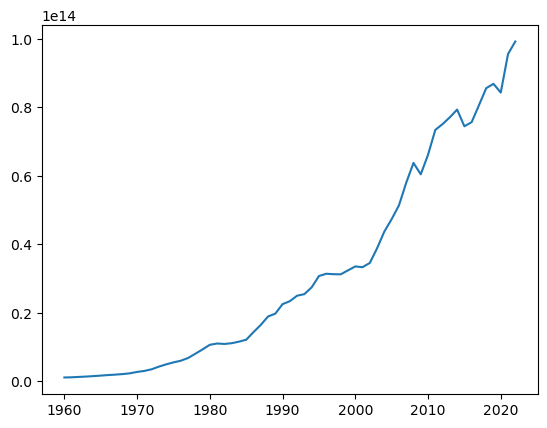

In [16]:
plt.plot(yearly_total_gdp["year"],yearly_total_gdp["GDP"])
plt.show()
# Continuous growth is seen in gdp with few sudden fall
# Tremoundous 

<AxesSubplot:xlabel='year', ylabel='GDP'>

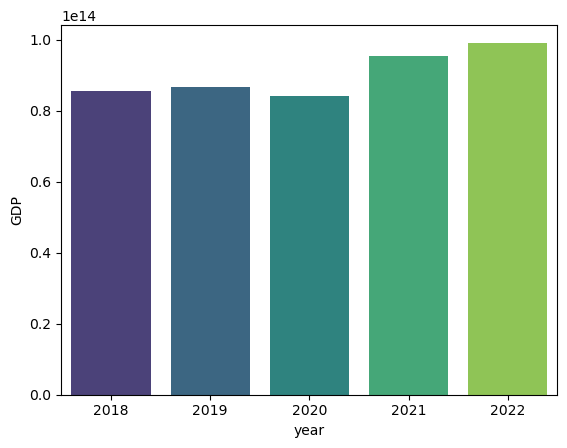

In [20]:
# Top 5 years with maximum GDP
top_years = yearly_total_gdp.sort_values(by="GDP", ascending=False).head(5)
sns.barplot(x="year",y="GDP",data=top_years,palette="viridis")
# there was drop in 2020 probably due to covid

<AxesSubplot:xlabel='year', ylabel='GDP'>

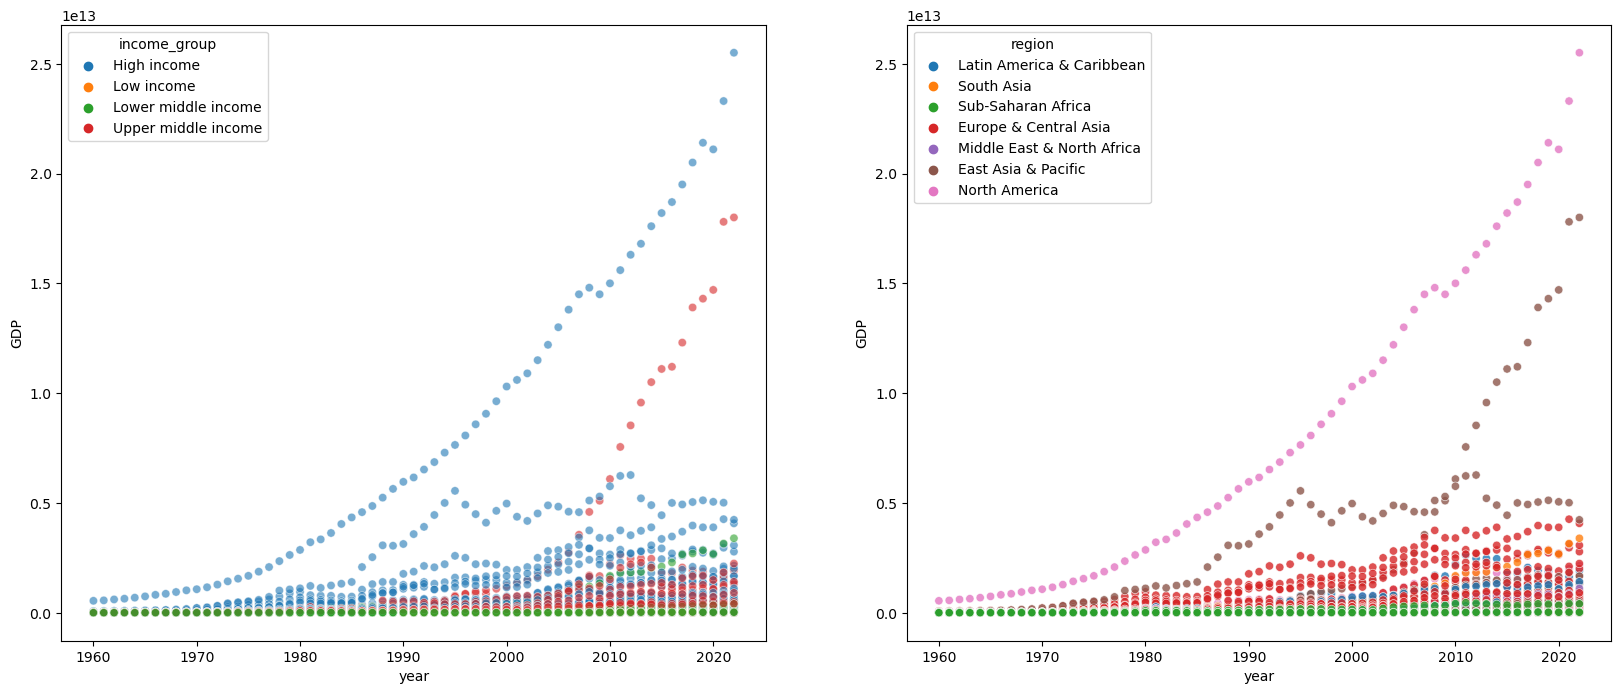

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.scatterplot(x='year', y='GDP', data=df, hue='income_group', alpha=0.6, ax=axes[0])
sns.scatterplot(x='year', y='GDP', data=df, hue='region', alpha=0.8, ax=axes[1])
# High income and Upper middle income countries have shown significant growth in GDP over the years
# Regions: North America, East Asia & Pacific has shown most significant growth in GDP